## Twitter Data Statistics

In [7]:
import os
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime
from scipy.stats import ttest_ind

ANN_FOLDER = '../im/data/tw_data/PDTB_Annotations_20200205__/ann/raw'

In [8]:
def get_files_in_folder(folder):
    return os.listdir(folder)

def create_statistics_per_file(folder):
    statistics = dict()
    file_paths = get_files_in_folder(folder)
    for file_path in file_paths:
        dict_id = file_path[:3]
        statistics[dict_id] = dict()
        statistics[dict_id]['file_path'] = folder + '/' + file_path
        with open(statistics[dict_id]['file_path']) as f:
            no_of_relations = 0
            no_of_imp_relations = 0
            no_of_exp_relations = 0
            no_of_hyp_relations = 0
            no_of_all_relations = 0
            for line in f:
                attributes = line.split('|')
                typ = attributes[0]
                no_of_all_relations += 1
                ### Count the relations with type explicit and implicit. exclude the rest
                if typ == 'Explicit':
                    no_of_exp_relations += 1
                    no_of_relations += 1
                if typ == 'Implicit':
                    no_of_imp_relations += 1
                    no_of_relations += 1
                if typ == 'Hypophora':
                    no_of_hyp_relations += 1
                    no_of_relations += 1
            statistics[dict_id]['num_of_relations'] = no_of_relations
            statistics[dict_id]['num_of_all_relations'] = no_of_all_relations
            statistics[dict_id]['num_of_exp_relations'] = no_of_exp_relations
            statistics[dict_id]['num_of_imp_relations'] = no_of_imp_relations
            statistics[dict_id]['num_of_hyp_relations'] = no_of_hyp_relations
            statistics[dict_id]['id'] = dict_id
    return statistics
        
stats = create_statistics_per_file(ANN_FOLDER)

In [9]:
imp_values   = [item['num_of_imp_relations'] for item in stats.values()]
exp_values   = [item['num_of_exp_relations'] for item in stats.values()]
total_values = [item['num_of_relations'] for item in stats.values()]
all_values = [item['num_of_all_relations'] for item in stats.values()]

In [ ]:
stats

### Distribution of total number of relations

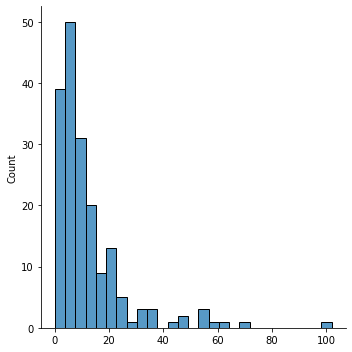

In [11]:
sb.displot(total_values)

### Distribution of total number of explicit relations

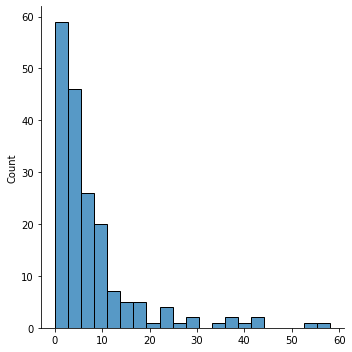

In [12]:
sb.displot(exp_values)

### Distibution of total number of implicit relations

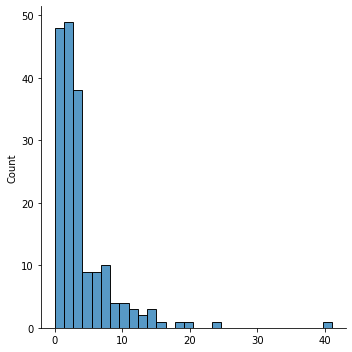

In [13]:
sb.displot(imp_values)

### Explicit/Implicit Graph

<AxesSubplot:xlabel='num_of_imp_relations', ylabel='num_of_exp_relations'>

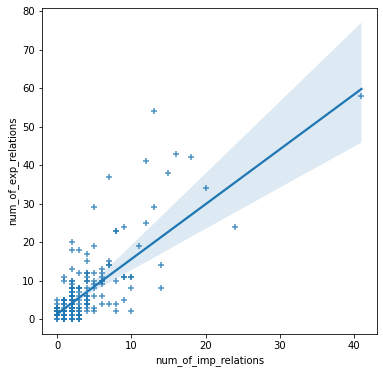

In [14]:
stats_df = pd.DataFrame.from_dict(stats, orient='index')

# create figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
sb.regplot(data=stats_df, x="num_of_imp_relations", y="num_of_exp_relations", ax=ax, robust=True, marker='+')

In [15]:
stats_df.head()

,file_path,num_of_relations,num_of_all_relations,num_of_exp_relations,num_of_imp_relations,num_of_hyp_relations,id
514,../im/data/tw_data/PDTB_Annotations_20200205__...,6,6,3,3,0,514
128,../im/data/tw_data/PDTB_Annotations_20200205__...,15,15,11,4,0,128
162,../im/data/tw_data/PDTB_Annotations_20200205__...,4,4,2,1,1,162
183,../im/data/tw_data/PDTB_Annotations_20200205__...,4,4,2,1,1,183
107,../im/data/tw_data/PDTB_Annotations_20200205__...,12,12,8,3,1,107


In [16]:
stats_df.describe()

,num_of_relations,num_of_all_relations,num_of_exp_relations,num_of_imp_relations,num_of_hyp_relations
count,184.000000,184.000000,184.000000,184.000000,184.000000
mean,12.402174,12.402174,7.788043,3.978261,0.635870
std,14.189244,14.189244,9.719771,4.798630,1.087945
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,2.000000,1.000000,0.000000
50%,8.000000,8.000000,4.500000,2.000000,0.000000
75%,15.000000,15.000000,10.000000,5.000000,1.000000
max,102.000000,102.000000,58.000000,41.000000,8.000000


In [17]:
stats_df.sum()

file_path               ../im/data/tw_data/PDTB_Annotations_20200205__...
num_of_relations                                                     2282
num_of_all_relations                                                 2282
num_of_exp_relations                                                 1433
num_of_imp_relations                                                  732
num_of_hyp_relations                                                  117
id                      5141281621831070981040851640025045340540880015...
dtype: object

In [18]:
def try_partitioning(number_of_trials, files, train_percentage):
    file_ids = files.keys()
    total = sum([file['num_of_relations'] for file in files.values()])
    print(total)
    number_of_files = len(file_ids)
    trials = []
    
    now = datetime.now()

    current_time = now.strftime("%H%M%S")
    
    target = math.floor(total * train_percentage / 100)
    
    with open(current_time + '_results', 'w+') as f:
        for i in range(number_of_trials):
            # train
            start_id = list(files.keys())[np.random.randint(0, high=number_of_files)]
            start_file = files[start_id]
            total_sum = start_file['num_of_relations']
            train_file_ids = []
            train_file_ids.append(start_id)
            while (total_sum < target):
                new_id = list(files.keys())[np.random.randint(0, high=number_of_files)]
                if new_id in train_file_ids:
                    continue
                new_file = files[new_id]
                train_file_ids.append(new_id)
                total_sum += new_file['num_of_relations']

            # test
            test_file_ids = []
            for _id in file_ids:
                if _id not in train_file_ids:
                    test_file_ids.append(_id)
            # dev
            dev_target = ((total - target) / 2)
            dev_file_ids = []
            dev_sum = 0
            while (dev_sum < dev_target):
                random_id = test_file_ids[np.random.randint(0, high=len(test_file_ids))]
                dev_file_ids.append(random_id)
                dev_sum += files[random_id]['num_of_relations']
                test_file_ids.remove(random_id)

            train_files = [files[_id] for _id in train_file_ids]
            test_files = [files[_id] for _id in test_file_ids]
            dev_files = [files[_id] for _id in dev_file_ids]

            train_e = sum([file['num_of_exp_relations'] for file in train_files])
            train_i = sum([file['num_of_imp_relations'] for file in train_files])

            test_e = sum([file['num_of_exp_relations'] for file in test_files])
            test_i = sum([file['num_of_imp_relations'] for file in test_files])

            dev_e = sum([file['num_of_exp_relations'] for file in dev_files])
            dev_i = sum([file['num_of_imp_relations'] for file in dev_files])
            

            f.write('train:' + str(train_e) + ' ' + str(train_i) + ' ' + str(train_e / train_i) + '\n')
            f.write('test:' + str(test_e) + ' ' + str(test_i) + ' ' + str(test_e / test_i) + '\n')
            f.write('dev:' + str(dev_e) + ' ' + str(dev_i) + ' ' + str(dev_e / dev_i) + '\n')
            
            f.write('\n')
            
            f.write('train files: ' + str([file['id'] for file in train_files]) + '\n')
            f.write('test files: ' + str([file['id'] for file in test_files]) + '\n')
            f.write('dev files: ' + str([file['id'] for file in dev_files]) + '\n')
            
            f.write('total rel scores: ' + str((total_sum / total) / (train_percentage / 100)) + ' ' + str(dev_target / dev_sum) + '\n')
            f.write('specific rel score:' + str(train_e / train_i) + ' ' + str(test_e / test_i) + ' ' + str(dev_e / dev_i) + '\n')
            
            f.write('---------------------------------------------------------------')
            f.write('\n')
            
            

    

In [19]:
# try_partitioning(100, stats, 80)

## With respect to types

In [20]:
from parse_annotation import parse_annotation, parse_relations, parse_tweets
import numpy as np
from functools import reduce
import pandas as pd

BASE_DATA_PATH = "/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points"
THREADS_PATH = BASE_DATA_PATH + "/threads"
FIXED_PATH = BASE_DATA_PATH + "/fixed"
ANN_PATH = BASE_DATA_PATH + "/ann"
RAW_PATH = '/home/burak/Desktop/thesis/code/IM/twitter_data/raw'
RAW_ANN_PATH = '/home/burak/Desktop/thesis/code/IM/twitter_data/ann/raw'

def calculate_length_from_range(_range):
    ranges = _range.split(';')
    length = 0
    for r in ranges:
        values = r.split('..')
        if len(values) == 1:
            continue
        length += int(values[1]) - int(values[0])
    return length

def get_sense(full_sense, level=3):
    return '.'.join(full_sense.split('.')[:level])
    

In [21]:
import traceback

files = os.listdir(THREADS_PATH)

readable_annotations = dict()
tweets = dict()

for file in files:
    try:
        readable_annotations[file] = list()
        for annotation in parse_annotation(
            THREADS_PATH + '/' + file,
            ANN_PATH + '/' + file,
            check_intertweet=True
        ):
            readable_annotations[file].append(annotation)
        file_tweets = parse_tweets(
            file,
            readable_annotations[file],
            RAW_PATH,
            THREADS_PATH
        )
        tweets[file] = file_tweets
    except Exception as inst:
        print(file, inst)
        tb = traceback.format_exc()
        print(tb)
        print('----------------------------------------------------')

all_annotations = reduce(lambda x, y: x+y, [file_annotations for file_annotations in readable_annotations.values()])

093_950279658192347136.branch49.txt.username_text_tabseparated [Errno 2] No such file or directory: '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/ann/093_950279658192347136.branch49.txt.username_text_tabseparated'
Traceback (most recent call last):
  File "/tmp/ipykernel_12993/1801558918.py", line 14, in <module>
    check_intertweet=True
  File "/home/burak/Desktop/thesis/code/IM/thesis/parse_annotation.py", line 26, in parse_annotation
    with open(annotated_file_path) as ann_file:
FileNotFoundError: [Errno 2] No such file or directory: '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/ann/093_950279658192347136.branch49.txt.username_text_tabseparated'

----------------------------------------------------


In [22]:
def get_relation(file_id, tweet_id):
    return readable_annotations[file_id][tweet_id]

In [23]:
annotations_df = pd.DataFrame(all_annotations)

In [ ]:
annotations_df.head()

In [25]:
annotations_df[annotations_df['file_id'] == '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/threads/171_950374352331198464.branch4.txt.username_text_tabseparated']

,file_id,arg1_range,arg2_range,arg1,arg2,connective_range,connective,sense,type,intertweet
169,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,78..94,100..128,[are raping women],[staying silent about rapists],96..99,[and],Expansion.Conjunction,Explicit,False
170,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,34..132,133..189,"[A place where rich, privileged liberals who a...",[to talk about how morally outraged they are a...,133,None,Contingency.Purpose.Argas-goal,Implicit,False
171,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,34..189,205..223,"[A place where rich, privileged liberals who a...",[No one mentioned T],205,None,Comparison.Concession.Argas-denier,Implicit,False
172,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,321..348,353..437,[it's a new day...come join.],[the rapists were called out earlier and will ...,349..352,[And],Expansion.Conjunction,Explicit,False
173,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,353..388,393..412,[the rapists were called out earlier],[will continue to be],389..392,[and],Expansion.Conjunction,Explicit,False
174,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,353..412,414..437,[the rapists were called out earlier and will ...,[be he president or not.],414,None,Comparison.Concession.Argas-denier,Implicit,False
175,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,483..549,550..599,[They have a nerve trying to act like they are...,[Those in attendance played at part in the cri...,550,None,Contingency.Cause.Reason,Implicit,False
176,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,549..598,599..650,[ Those in attendance played at part in the cr...,"[ They celebrated the likes of Woody Alen, Wei...",599,None,Expansion.Manner.Argas-manner,Implicit,False
177,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,483..651,652..703,[They have a nerve trying to act like they are...,[The word hypocrisy is something you should lo...,652,None,Contingency.Cause.Result,Implicit,False
178,/home/burak/Desktop/thesis/code/IM/im/data/tw_...,794..837,838..868,[There was a positive message at the Globes.],[Get on board and stop pouting.],838,None,Contingency.Cause.Result,Implicit,False


In [26]:
annotations_df['arg1_length'] = annotations_df['arg1_range'].map(calculate_length_from_range)
annotations_df['arg2_length'] = annotations_df['arg2_range'].map(calculate_length_from_range)
annotations_df['sense_level1'] = annotations_df['sense'].map(lambda sense: get_sense(sense, 1))
annotations_df['sense_level2'] = annotations_df['sense'].map(lambda sense: get_sense(sense, 2))

In [27]:
arg1_hyp = annotations_df[annotations_df['type'] == 'Hypophora']['arg1_length']
arg2_hyp = annotations_df[annotations_df['type'] == 'Hypophora']['arg2_length']
ttest_ind(arg1_hyp, arg2_hyp)

Ttest_indResult(statistic=-4.012175309399825, pvalue=8.13953091182904e-05)

In [28]:
annotations_df['type'].value_counts(normalize=True)

Explicit     0.626495
Implicit     0.322109
Hypophora    0.051396
Name: type, dtype: float64

In [31]:
annotations_df[annotations_df['sense_level1'] != '']['sense_level1'].value_counts(normalize=True)

Contingency    0.334890
Expansion      0.319944
Comparison     0.244745
Temporal       0.096684
Undecided      0.003737
Name: sense_level1, dtype: float64

In [30]:
annotations_df[annotations_df['sense_level1'] != '']['sense_level1'].value_counts(normalize=True)

Contingency    0.334890
Expansion      0.319944
Comparison     0.244745
Temporal       0.096684
Undecided      0.003737
Name: sense_level1, dtype: float64

In [32]:
annotations_df['sense_level2'].value_counts(normalize=True)

Expansion.Conjunction              0.230394
Contingency.Cause                  0.204696
Comparison.Concession              0.199823
Contingency.Condition              0.064688
                                   0.051396
Temporal.Synchronous               0.047851
Temporal.Asynchronous              0.043864
Comparison.Contrast                0.025255
Expansion.Substitution             0.022596
Contingency.Cause+Belief           0.020381
Expansion.Disjunction              0.018609
Expansion.Level-of-detail          0.014178
Contingency.Negative-condition     0.011520
Expansion.Equivalence              0.008861
Contingency.Purpose                0.007532
Contingency.Cause+SpeechAct        0.007089
Comparison.Similarity              0.006203
Expansion.Manner                   0.003988
Undecided                          0.003545
Expansion.Instantiation            0.002658
Expansion.Exception                0.002215
Contingency.Condition+SpeechAct    0.001772
Comparison.Concession+SpeechAct 

### Statictics for Implicit Relations

In [34]:
implicit_relations = annotations_df[annotations_df['type'] == 'Implicit']

In [35]:
implicit_relations['intertweet'].value_counts()

False    647
True      80
Name: intertweet, dtype: int64

#### -Senses

In [36]:
implicit_relations['sense_level1'].value_counts(normalize=True)

Contingency    0.426410
Expansion      0.297111
Comparison     0.235213
Temporal       0.041265
Name: sense_level1, dtype: float64

In [239]:
implicit_relations['sense_level1'].value_counts(normalize=True)

Contingency    0.426410
Expansion      0.297111
Comparison     0.235213
Temporal       0.041265
Name: sense_level1, dtype: float64

In [240]:
implicit_relations['sense_level2'].value_counts()

Contingency.Cause                  258
Comparison.Concession              133
Expansion.Conjunction              123
Expansion.Substitution              38
Comparison.Contrast                 36
Expansion.Level-of-detail           27
Temporal.Asynchronous               20
Expansion.Equivalence               16
Contingency.Cause+Belief            13
Contingency.Condition               12
Contingency.Purpose                 12
Contingency.Cause+SpeechAct         11
Temporal.Synchronous                10
Expansion.Disjunction                5
Contingency.Negative-condition       4
Expansion.Instantiation              4
Expansion.Manner                     2
Comparison.Similarity                1
Comparison.Concession+SpeechAct      1
Expansion.Exception                  1
Name: sense_level2, dtype: int64

In [241]:
implicit_relations['sense'].value_counts()

Comparison.Concession.Argas-denier                        133
Contingency.Cause.Reason                                  129
Contingency.Cause.Result                                  129
Expansion.Conjunction                                     123
Expansion.Substitution.Argas-subst                         38
Comparison.Contrast                                        36
Expansion.Level-of-detail.Argas-detail                     27
Expansion.Equivalence                                      16
Temporal.Asynchronous.Precedence                           12
Contingency.Condition.Argas-cond                           12
Contingency.Purpose.Argas-goal                             12
Contingency.Cause+Belief.Reason+Belief                     10
Temporal.Synchronous                                       10
Contingency.Cause+SpeechAct.Reason+SpeechAct                9
Temporal.Asynchronous.Succession                            8
Expansion.Disjunction                                       5
Expansio

In [242]:
implicit_relations.describe()

# neden 0 var?

,arg1_length,arg2_length
count,727.000000,727.000000
mean,56.594223,50.407153
std,39.482941,33.610135
min,0.000000,0.000000
25%,29.000000,28.000000
50%,46.000000,40.000000
75%,73.000000,63.000000
max,293.000000,289.000000


### Statistics for Explicit Relations

In [243]:
explicit_relations = annotations_df[annotations_df['type'] == 'Explicit']

#### -Intertweets

In [244]:
explicit_relations['intertweet'].value_counts()

False    1283
True      123
            8
Name: intertweet, dtype: int64

In [ ]:
explicit_relations[(explicit_relations['intertweet'] != False) & (explicit_relations['intertweet'] != True)]

#### -Senses

In [246]:
explicit_relations['sense_level1'].value_counts(normal)

Expansion      469
Contingency    407
Comparison     353
Temporal       177
Undecided        8
Name: sense_level1, dtype: int64

In [247]:
explicit_relations['sense_level1'].value_counts(normalize=True)

Expansion      0.331683
Contingency    0.287836
Comparison     0.249646
Temporal       0.125177
Undecided      0.005658
Name: sense_level1, dtype: float64

In [248]:
explicit_relations['sense_level2'].value_counts()

Expansion.Conjunction              397
Comparison.Concession              318
Contingency.Cause                  204
Contingency.Condition              134
Temporal.Synchronous                98
Temporal.Asynchronous               79
Expansion.Disjunction               37
Contingency.Cause+Belief            33
Contingency.Negative-condition      22
Comparison.Contrast                 21
Comparison.Similarity               13
Expansion.Substitution              13
Undecided                            8
Expansion.Manner                     7
Contingency.Purpose                  5
Expansion.Level-of-detail            5
Contingency.Cause+SpeechAct          5
Contingency.Condition+SpeechAct      4
Expansion.Exception                  4
Expansion.Equivalence                4
Expansion.Instantiation              2
Comparison.Concession+SpeechAct      1
Name: sense_level2, dtype: int64

In [249]:
explicit_relations['sense'].value_counts()

Expansion.Conjunction                                     397
Comparison.Concession.Argas-denier                        318
Contingency.Condition.Argas-cond                          134
Contingency.Cause.Reason                                  108
Temporal.Synchronous                                       98
Contingency.Cause.Result                                   96
Temporal.Asynchronous.Precedence                           66
Expansion.Disjunction                                      37
Contingency.Negative-condition.Argas-negcond               22
Comparison.Contrast                                        21
Contingency.Cause+Belief.Reason+Belief                     17
Contingency.Cause+Belief.Result+Belief                     16
Expansion.Substitution.Argas-subst                         13
Comparison.Similarity                                      13
Temporal.Asynchronous.Succession                           13
Undecided                                                   8
Expansio

In [250]:
explicit_relations.describe()
### bu fark statistically significant mi?
### explorative analiz

,arg1_length,arg2_length
count,1414.000000,1414.000000
mean,47.094767,42.666195
std,38.860715,32.010398
min,-85.000000,0.000000
25%,23.000000,21.000000
50%,36.000000,34.000000
75%,59.000000,54.000000
max,293.000000,235.000000


#### -Connectives

In [322]:
explicit_relations['connective'].apply(lambda cons: tuple([con.lower() for con in cons])).value_counts()

(and,)               353
(but,)               225
(if,)                101
(so,)                 93
(when,)               84
                    ... 
(as a result of,)      1
(if not, then)         1
(rather, than)         1
(by the way,)          1
(hence,)               1
Name: connective, Length: 119, dtype: int64

In [329]:
explicit_relations['connective'].apply(lambda cons: tuple([con.lower() for con in cons])).value_counts().keys()

Index([           ('and',),            ('but',),             ('if',),
                   ('so',),           ('when',),        ('because',),
                 ('also',),             ('or',),             ('as',),
                ('&amp;',),
       ...
              ('anytime',),      ('nl.\nwhen',),        ('either.',),
                  ('ie.',),        ('thereby',), ('as a result of',),
        ('if not', 'then'),  ('rather', 'than'),     ('by the way',),
                ('hence',)],
      dtype='object', length=119)

In [342]:
t_connectives = list(explicit_relations['connective'].apply(lambda cons: tuple([con.lower() for con in cons])).value_counts().keys())
sum([len(''.join(list(connective))) for connective in t_connectives]) / len(t_connectives)

6.201680672268908

In [343]:
t_connectives

[('and',),
 ('but',),
 ('if',),
 ('so',),
 ('when',),
 ('because',),
 ('also',),
 ('or',),
 ('as',),
 ('&amp;',),
 ('then',),
 ('though',),
 ('before',),
 ('like',),
 ('while',),
 ('until',),
 ('if', 'then'),
 ('however',),
 ('even if',),
 ('still',),
 ('since',),
 ('without',),
 ('after',),
 ('yet',),
 ('&amp',),
 ('instead of',),
 ('unless',),
 ('in case',),
 ('tho',),
 ('anyway',),
 ('cos',),
 ('bc',),
 ('so that',),
 ('by',),
 ('not only', 'but'),
 ('rather',),
 ('btw',),
 ('only',),
 ('because of',),
 ('even though',),
 ('either', 'or'),
 ('except',),
 ('an',),
 ('whilst',),
 ('nor',),
 ('once',),
 ('therefore',),
 ('',),
 ('whenever',),
 ('although',),
 ('instead',),
 ('whatever',),
 ('even when',),
 ('rather than',),
 ('becasue',),
 ('whereas',),
 ('furthermore',),
 ('for',),
 ('after all',),
 ('cuz',),
 ('as long as',),
 ('wen',),
 ('b4',),
 ('plus',),
 ('meanwhile',),
 ('so as',),
 ('otherwise',),
 ('with',),
 ('but then',),
 ('cus',),
 ('do',),
 ('eg',),
 ("that's",),
 ('wher

In [252]:
b = explicit_relations['connective'].apply(lambda cons: tuple([con.lower() for con in cons])).value_counts()
b.head(25)

(and,)        353
(but,)        225
(if,)         101
(so,)          93
(when,)        84
(because,)     68
(also,)        40
(or,)          40
(as,)          31
(&amp;,)       29
(then,)        26
(though,)      23
(before,)      14
(like,)        12
(while,)       11
(until,)       11
(if, then)     10
(however,)      9
(even if,)      9
(still,)        9
(since,)        8
(without,)      8
(after,)        7
(yet,)          6
(&amp,)         6
Name: connective, dtype: int64

In [253]:
b[b == (' i',)]

/home/burak/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/core/computation/expressions.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Series([], Name: connective, dtype: int64)

### Statistics for Hypophora Relations

In [254]:
hypophora_relations = annotations_df[annotations_df['type'] == 'Hypophora']

In [255]:
hypophora_relations.describe()

,arg1_length,arg2_length
count,116.000000,116.000000
mean,51.396552,76.672414
std,35.017481,58.116341
min,7.000000,0.000000
25%,27.000000,32.000000
50%,42.000000,59.000000
75%,69.250000,114.250000
max,236.000000,257.000000


### Per tweet analysis

In [256]:
tweets_flat = []
for thread in tweets.keys():
    thread_tweets = tweets[thread]
    for thread_tweet in thread_tweets:
        thread_tweet['file_id'] = thread
        tweets_flat.append(thread_tweet)

        
        
tweets_df = pd.DataFrame(tweets_flat)



In [257]:
tweets_df.describe()

,poster,tweet_text,arg1,arg2,connective,file_id
count,1713,1713,1713,1713,1713,1713
unique,586,1710,256,249,250,183
top,Number10gov,Who am I ?,{},{},{},029_948125154525286401.branch73.txt.username_t...
freq,54,3,624,637,903,78


In [258]:
tweets_df['tweet_id'] = tweets_df.index
tweets_df['tweet_length'] = tweets_df['tweet_text'].map(len)
tweets_df['relations'] = tweets_df.apply(lambda row: row['connective'].union(row['arg1'], row['arg2']), axis=1)

Exploding to calculate:  
- intertweet relationlar tek userdan mi, userlarin birbiri ile etkilesiminden mi

In [ ]:
tweets_df_exploded = tweets_df.explode('relations')
tweets_df_exploded

how many relations are intertweet? (bunlarin orneklerini cikar)

In [260]:
a = tweets_df_exploded.groupby(['file_id', 'relations']).agg(['nunique'])
a['tweet_id']['nunique'].value_counts()

1    1910
2     342
3       5
Name: nunique, dtype: int64

an example relation that spans into 3 tweets

In [261]:
get_relation(*a[a['tweet_id']['nunique'] == 3].iloc[0].name)

{'file_id': '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/threads/004_945997191973289985.branch40.txt.username_text_tabseparated',
 'arg1_range': '957..1038;1043..1197',
 'arg2_range': '1202..1355',
 'arg1': ['individualism is often used to refer to structures that promotes egoistic values.',
  'And similarly collectivism is used to refer to structures that regulates the system towards some convergent (reasonable or unreasonable) utility function.'],
 'arg2': ["Clearly mechanisms which are individualist in the choice-granting definition, may or may not be pervaded by structures with 'individualistic' tendencies."],
 'connective_range': '1202',
 'connective': None,
 'sense': 'Contingency.Cause.Result',
 'type': 'Implicit',
 'intertweet': False}

an example relation that spans into 2 tweets

In [262]:
get_relation(*a[a['tweet_id']['nunique'] == 2].iloc[0].name)

{'file_id': '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/threads/002_945611482460446722.branch27.txt.username_text_tabseparated',
 'arg1_range': '199..215',
 'arg2_range': '221..260',
 'arg1': ['Time is short!!!'],
 'arg2': ['Not as short as your career highlights.'],
 'connective_range': '221',
 'connective': None,
 'sense': 'Comparison.Concession.Argas-denier',
 'type': 'Implicit',
 'intertweet': True}

between how many users are the intertweet relations? (bunlarin orneklerini cikar)

In [263]:
a[a['tweet_id']['nunique'] > 1].value_counts(('poster', 'nunique'))

(poster, nunique)
2    281
1     64
3      2
dtype: int64

a relation that spans tweets from 3 users

In [264]:
get_relation(*a[a['poster']['nunique'] == 3].iloc[1].name)

{'file_id': '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/threads/096_950301036245381120.branch110.txt.username_text_tabseparated',
 'arg1_range': '715..905;906..1009',
 'arg2_range': '1026..1046',
 'arg1': ["It is purely an exercise in vindictive hatred, of a preselected group of human beings by an ignorant, would be tyrant. One who's\u200b lower level IQ, is only exceeded by his excessive ignorance.",
  "Who are you to comment on another person's IQ. It is a reveal of how insecure one is when they do that."],
 'arg2': ['answer the question.'],
 'connective_range': '1023..1025',
 'connective': ['So'],
 'sense': 'Contingency.Cause.Result',
 'type': 'Explicit',
 'intertweet': False}

a relation that spans tweets from 2 users

In [265]:
get_relation(*a[a['poster']['nunique'] == 2].iloc[0].name)

{'file_id': '/home/burak/Desktop/thesis/code/IM/im/data/tw_data/PDTB_Annotations_20200205__/preprocessed_with_points/threads/002_945611482460446722.branch27.txt.username_text_tabseparated',
 'arg1_range': '199..215',
 'arg2_range': '221..260',
 'arg1': ['Time is short!!!'],
 'arg2': ['Not as short as your career highlights.'],
 'connective_range': '221',
 'connective': None,
 'sense': 'Comparison.Concession.Argas-denier',
 'type': 'Implicit',
 'intertweet': True}

How many tweets have more than one connective?

In [266]:
tweets_df['connective'].map(lambda row: len(row) > 1).value_counts()[True]

379

In [ ]:
c = tweets_df[tweets_df['connective'].str.len() == 6].iloc[1]
print(c.file_id)
print(c.connective)
cur = readable_annotations[c.file_id]
[cur[i] for i in list(c.connective)]

example (2,3,4) (5in 0. orneginde iki relationa referans eden connective var.

In [ ]:

print('1 connectives:', tweets_df[tweets_df['connective'].str.len() == 1].iloc[22]['tweet_text'], '\n')
print('2 connectives:', tweets_df[tweets_df['connective'].str.len() == 2].iloc[0]['tweet_text'], '\n')
print('3 connectives:', tweets_df[tweets_df['connective'].str.len() == 3].iloc[0]['tweet_text'], '\n')
print('4 connectives:', tweets_df[tweets_df['connective'].str.len() == 4].iloc[0]['tweet_text'], '\n')
print('5 connectives:', tweets_df[tweets_df['connective'].str.len() == 5].iloc[3]['tweet_text'], '\n')
print('6 connectives:', tweets_df[tweets_df['connective'].str.len() == 6].iloc[1]['tweet_text'], '\n')

How many tweets have a connective?

In [269]:
tweets_df['connective'].map(lambda row: len(row) > 0).value_counts()[True]

810

Connective count distribution per tweet

In [270]:
tweets_df['connective'].map(len).value_counts()

0    903
1    431
2    224
3    102
4     37
5     14
6      2
Name: connective, dtype: int64

In [271]:
tweets_df[tweets_df['connective'].map(lambda row: len(row) > 0)]['tweet_length'].describe()

count    810.000000
mean     163.241975
std       79.623656
min        8.000000
25%       96.250000
50%      157.000000
75%      235.000000
max      304.000000
Name: tweet_length, dtype: float64

In [272]:
tweets_df[tweets_df['connective'].map(lambda row: len(row) > 1)]['tweet_length'].describe()

count    379.000000
mean     196.102902
std       73.303186
min        8.000000
25%      137.000000
50%      212.000000
75%      262.000000
max      304.000000
Name: tweet_length, dtype: float64

In [273]:
tweets_df[tweets_df['connective'].map(lambda row: len(row) > 3)]['tweet_length'].describe()

count     53.000000
mean     235.886792
std       63.399727
min       23.000000
25%      224.000000
50%      259.000000
75%      278.000000
max      303.000000
Name: tweet_length, dtype: float64

In [274]:
rel_counts = [max(set().union(*rels), default=-1) + 1 for rels in tweets_df.groupby('file_id').agg('max')[['arg1', 'arg2', 'connective']].values]

In [275]:
sum(rel_counts)

2257

intertweet type distribution

In [276]:
intertweets = a[a['tweet_id']['nunique'] > 1]
intertweet_relations = []
for name in list(intertweets.index):
    intertweet_relations.append(get_relation(*name))

intertweet_df = pd.DataFrame(intertweet_relations)

In [277]:
intertweet_df['type'].value_counts()

Explicit     146
Hypophora    111
Implicit      90
Name: type, dtype: int64

## PDTB Statistics

In [278]:
CONLL_FOLDER = '/home/burak/Desktop/thesis/code/IM/conll_data'

## test
pdtb_test_annotations = parse_relations(CONLL_FOLDER + '/en.test/relations.json')
## train
pdtb_train_annotations = parse_relations(CONLL_FOLDER + '/en.train/relations.json')
## dev
pdtb_dev_annotations = parse_relations(CONLL_FOLDER + '/en.dev/relations.json')

pdtb_all_annotations = []
pdtb_all_annotations.extend(pdtb_test_annotations)
pdtb_all_annotations.extend(pdtb_train_annotations)
pdtb_all_annotations.extend(pdtb_dev_annotations)

pdtb_df = pd.DataFrame(pdtb_all_annotations)

In [279]:
pdtb_df['arg1_length'] = pdtb_df['arg1'].apply(lambda arg: len(arg))
pdtb_df['arg2_length'] = pdtb_df['arg2'].apply(lambda arg: len(arg))
pdtb_df['sense_level1'] = pdtb_df['sense'].map(lambda sense: get_sense(sense, 1))
pdtb_df['sense_level2'] = pdtb_df['sense'].map(lambda sense: get_sense(sense, 2))
pdtb_df.describe()

,arg1_length,arg2_length
count,35910.000000,35910.000000
mean,99.440741,92.627625
std,72.342585,62.195348
min,2.000000,2.000000
25%,54.000000,50.000000
50%,87.000000,81.000000
75%,131.000000,123.000000
max,6091.000000,2523.000000


In [280]:
len(pdtb_df)

35910

In [281]:
pdtb_df['type'].value_counts(normalize=True)

Explicit    0.454609
Implicit    0.402311
EntRel      0.127123
AltLex      0.015957
Name: type, dtype: float64

In [282]:
pdtb_df['type'].value_counts()

Explicit    16325
Implicit    14447
EntRel       4565
AltLex        573
Name: type, dtype: int64

In [283]:
pdtb_df[pdtb_df['type'] != 'EntRel']['sense_level1'].value_counts()

Expansion      13466
Comparison      7086
Contingency     6870
Temporal        3923
Name: sense_level1, dtype: int64

In [284]:
pdtb_df[pdtb_df['sense_level1'] != 'EntRel']['sense_level1'].value_counts()

Expansion      13466
Comparison      7086
Contingency     6870
Temporal        3923
Name: sense_level1, dtype: int64

In [285]:
pdtb_df[pdtb_df['sense_level1'] != 'EntRel']['sense_level1'].value_counts(normalize=True)

Expansion      0.429606
Comparison     0.226065
Contingency    0.219174
Temporal       0.125156
Name: sense_level1, dtype: float64

In [286]:
pdtb_df[pdtb_df['sense_level2'] != 'EntRel']['sense_level2'].value_counts()

Expansion.Conjunction      8343
Contingency.Cause          5603
Comparison.Contrast        5245
Expansion.Restatement      2970
Temporal.Asynchronous      2462
Expansion.Instantiation    1549
Temporal.Synchrony         1455
Comparison.Concession      1327
Contingency.Condition      1265
Comparison                  514
Expansion.Alternative       481
Expansion                   108
Expansion.Exception          15
Temporal                      6
Contingency                   2
Name: sense_level2, dtype: int64

### Statistics for Implicit Relations

In [287]:
pdtb_implicit_relations = pdtb_df[pdtb_df['type'] == 'Implicit']

In [288]:
pdtb_implicit_relations['sense_level1'].value_counts(normalize=True)

Expansion      0.537551
Contingency    0.260192
Comparison     0.150343
Temporal       0.051914
Name: sense_level1, dtype: float64

In [289]:
pdtb_implicit_relations['sense_level2'].value_counts(normalize=True)

Contingency.Cause          0.259985
Expansion.Conjunction      0.241434
Expansion.Restatement      0.192220
Comparison.Contrast        0.126185
Expansion.Instantiation    0.086385
Temporal.Asynchronous      0.040354
Comparison.Concession      0.014051
Expansion.Alternative      0.011767
Temporal.Synchrony         0.011490
Comparison                 0.010106
Expansion                  0.005676
Contingency.Condition      0.000138
Expansion.Exception        0.000069
Temporal                   0.000069
Contingency                0.000069
Name: sense_level2, dtype: float64

In [290]:
pdtb_implicit_relations['sense'].value_counts()

Expansion.Conjunction                       3488
Expansion.Restatement                       2777
Contingency.Cause.Reason                    2245
Comparison.Contrast                         1823
Contingency.Cause.Result                    1510
Expansion.Instantiation                     1248
Temporal.Asynchronous.Precedence             450
Comparison.Concession                        203
Temporal.Synchrony                           166
Expansion.Alternative.Chosen alternative     159
Comparison                                   146
Temporal.Asynchronous.Succession             133
Expansion                                     82
Expansion.Alternative                         11
Contingency.Condition                          2
Expansion.Exception                            1
Temporal                                       1
Contingency                                    1
Contingency.Cause                              1
Name: sense, dtype: int64

In [291]:
pdtb_implicit_relations.describe()

,arg1_length,arg2_length
count,14447.000000,14447.000000
mean,102.811726,104.824600
std,59.222918,69.936236
min,2.000000,5.000000
25%,61.000000,61.000000
50%,94.000000,94.000000
75%,133.000000,135.000000
max,1101.000000,2523.000000


### Statistics for Explicit Relations

In [292]:
pdtb_explicit_relations = pdtb_df[pdtb_df['type'] == 'Explicit']

In [293]:
pdtb_explicit_relations['sense_level1'].value_counts(normalize=True)

Expansion      0.336784
Comparison     0.298560
Temporal       0.189403
Contingency    0.175253
Name: sense_level1, dtype: float64

In [294]:
pdtb_explicit_relations['sense_level2'].value_counts()

Expansion.Conjunction      4750
Comparison.Contrast        3387
Temporal.Asynchronous      1815
Contingency.Cause          1599
Temporal.Synchrony         1272
Contingency.Condition      1261
Comparison.Concession      1119
Comparison                  368
Expansion.Alternative       311
Expansion.Instantiation     266
Expansion.Restatement       134
Expansion                    24
Expansion.Exception          13
Temporal                      5
Contingency                   1
Name: sense_level2, dtype: int64

In [295]:
pdtb_explicit_relations['sense'].value_counts()

Expansion.Conjunction                       4750
Comparison.Contrast                         3387
Temporal.Synchrony                          1272
Contingency.Condition                       1261
Comparison.Concession                       1119
Contingency.Cause.Reason                    1055
Temporal.Asynchronous.Succession             957
Temporal.Asynchronous.Precedence             855
Contingency.Cause.Result                     544
Comparison                                   368
Expansion.Instantiation                      266
Expansion.Alternative                        206
Expansion.Restatement                        134
Expansion.Alternative.Chosen alternative     105
Expansion                                     24
Expansion.Exception                           13
Temporal                                       5
Temporal.Asynchronous                          3
Contingency                                    1
Name: sense, dtype: int64

In [321]:
pdtb_explicit_relations['connective'].str.lower().value_counts().tail(11)

two days before                   1
nearly a year and a half after    1
only until                        1
primarily because                 1
several months before             1
almost immediately after          1
only three years after            1
plus                              1
in large part because             1
long after                        1
a full five minutes before        1
Name: connective, dtype: int64

In [348]:
p2_connectives = list(pdtb_explicit_relations['connective'].str.lower().value_counts().keys())
sum([len(p2_c) for p2_c in p2_connectives]) / len(p2_connectives)

12.160714285714286

In [297]:
pdtb_explicit_relations.describe()

,arg1_length,arg2_length
count,16325.000000,16325.000000
mean,89.079449,77.369678
std,84.192926,53.023372
min,2.000000,2.000000
25%,45.000000,39.000000
50%,72.000000,65.000000
75%,115.000000,103.000000
max,6091.000000,1422.000000


### Statistics for Hypophora relations

In [298]:
pdtb_hypophora_relations = pdtb_df[pdtb_df['type'] == 'Hypophora']

No hypophora relations.

## PDTB3 Statistics

In [299]:
PDTB3_FOLDER = '/home/burak/Downloads/PDTB-3.0_LDC2019T05/PDTB-3.0/data'

files = os.listdir(PDTB3_FOLDER + '/gold')

readable_annotations_pdtb3 = dict()

for file in files:
    readable_annotations_pdtb3[file] = list()
    for annotation in parse_annotation(
        PDTB3_FOLDER + '/raw/' + file,
        PDTB3_FOLDER + '/gold/' + file,
        extract_16=False
    ):
        readable_annotations_pdtb3[file].append(annotation)
    

pdtb3_all_annotations = reduce(lambda x, y: x+y, [file_annotations for file_annotations in readable_annotations_pdtb3.values()])

pdtb3_df = pd.DataFrame(pdtb3_all_annotations)

<class 'UnicodeDecodeError'>
<class 'UnicodeDecodeError'>
<class 'UnicodeDecodeError'>
<class 'UnicodeDecodeError'>
<class 'UnicodeDecodeError'>


In [300]:
pdtb3_df['type'].value_counts()

Explicit     24240
Implicit     21827
EntRel        5538
AltLex        1498
NoRel          287
Hypophora      146
AltLexC        140
Name: type, dtype: int64

In [301]:
pdtb3_df['type'].value_counts(normalize=True)

Explicit     0.451598
Implicit     0.406644
EntRel       0.103175
AltLex       0.027908
NoRel        0.005347
Hypophora    0.002720
AltLexC      0.002608
Name: type, dtype: float64

In [302]:
def calculate_length_from_range(_range):
    _sum = 0
    for r in _range.split(';'):
        if len(r) < 2:
            _sum += 0
            continue
        splitted = r.split('..')
        _sum += int(splitted[1]) - int(splitted[0])
    return _sum

def join_connectives(connective):
    if (connective != '--ERROR--') and (connective != None):
        return ' '.join(connective)
    return connective
    

In [303]:
pdtb3_df['arg1_length'] = pdtb3_df['arg1_range'].apply(calculate_length_from_range)
pdtb3_df['arg2_length'] = pdtb3_df['arg2_range'].apply(calculate_length_from_range)
pdtb3_df['sense_level1'] = pdtb3_df['sense'].map(lambda sense: get_sense(sense, 1))
pdtb3_df['sense_level2'] = pdtb3_df['sense'].map(lambda sense: get_sense(sense, 2))
pdtb3_df['connective'] = pdtb3_df['connective'].map(join_connectives)

In [304]:
pdtb3_df[['arg1_length', 'arg2_length']].describe()

,arg1_length,arg2_length
count,53676.000000,53676.000000
mean,86.882126,83.257433
std,67.881788,59.193842
min,2.000000,2.000000
25%,43.000000,42.000000
50%,73.000000,70.000000
75%,117.000000,112.000000
max,6173.000000,2555.000000


In [305]:
pdtb3_df[pdtb3_df['sense_level1'] != '']['sense_level1'].value_counts()

Expansion      20560
Contingency    12595
Comparison      8528
Temporal        6022
Name: sense_level1, dtype: int64

In [306]:
pdtb3_df[pdtb3_df['sense_level1'] != '']['sense_level1'].value_counts(normalize=True)

Expansion      0.430982
Contingency    0.264018
Comparison     0.178765
Temporal       0.126234
Name: sense_level1, dtype: float64

### Statistics for Implicit Relations

In [307]:
pdtb3_implicit_relations = pdtb3_df[pdtb3_df['type'] == 'Implicit']

In [308]:
pdtb3_implicit_relations['sense_level1'].value_counts()

Expansion      10051
Contingency     7589
Comparison      2388
Temporal        1799
Name: sense_level1, dtype: int64

In [309]:
pdtb3_implicit_relations['sense_level2'].value_counts()

Contingency.Cause                  5779
Expansion.Conjunction              4381
Expansion.Level-of-detail          3234
Comparison.Concession              1493
Expansion.Instantiation            1472
Contingency.Purpose                1385
Temporal.Asynchronous              1261
Comparison.Contrast                 857
Temporal.Synchronous                538
Expansion.Substitution              366
Expansion.Equivalence               334
Expansion.Manner                    229
Contingency.Condition               202
Contingency.Cause+Belief            199
Expansion.Disjunction                30
Comparison.Similarity                28
Contingency.Cause+SpeechAct          22
Comparison.Concession+SpeechAct      10
Expansion.Exception                   5
Contingency.Condition+SpeechAct       2
Name: sense_level2, dtype: int64

In [310]:
pdtb3_implicit_relations['sense'].value_counts()

Expansion.Conjunction                                       4381
Expansion.Level-of-detail.Arg2-as-detail                    2978
Contingency.Cause.Reason                                    2953
Contingency.Cause.Result                                    2826
Expansion.Instantiation.Arg2-as-instance                    1471
Comparison.Concession.Arg2-as-denier                        1435
Contingency.Purpose.Arg2-as-goal                            1382
Temporal.Asynchronous.Precedence                            1059
Comparison.Contrast                                          857
Temporal.Synchronous                                         538
Expansion.Substitution.Arg2-as-subst                         366
Expansion.Equivalence                                        334
Expansion.Level-of-detail.Arg1-as-detail                     256
Temporal.Asynchronous.Succession                             202
Contingency.Condition.Arg2-as-cond                           199
Expansion.Manner.Arg2-as-

In [311]:
pdtb3_implicit_relations.describe()

,arg1_length,arg2_length
count,21827.000000,21827.000000
mean,88.629496,91.502726
std,55.757267,65.992807
min,2.000000,2.000000
25%,47.000000,47.000000
50%,78.000000,79.000000
75%,119.000000,122.000000
max,922.000000,2555.000000


### Statistics for Explicit Relations

In [312]:
pdtb3_explicit_relations = pdtb3_df[pdtb3_df['type'] == 'Explicit']

In [313]:
pdtb3_explicit_relations['sense_level1'].value_counts()

Expansion      10218
Comparison      6014
Temporal        4063
Contingency     3945
Name: sense_level1, dtype: int64

In [314]:
pdtb3_explicit_relations['sense_level2'].value_counts()

Expansion.Conjunction              8769
Comparison.Concession              4776
Temporal.Asynchronous              2111
Temporal.Synchronous               1952
Contingency.Cause                  1937
Contingency.Condition              1398
Comparison.Contrast                1116
Contingency.Purpose                 381
Expansion.Instantiation             325
Expansion.Disjunction               304
Expansion.Manner                    283
Expansion.Level-of-detail           255
Expansion.Substitution              219
Contingency.Negative-condition      124
Comparison.Similarity               106
Contingency.Condition+SpeechAct      73
Expansion.Exception                  36
Contingency.Cause+Belief             30
Expansion.Equivalence                27
Comparison.Concession+SpeechAct      16
Contingency.Cause+SpeechAct           2
Name: sense_level2, dtype: int64

In [315]:
pdtb3_explicit_relations['sense'].value_counts()

Expansion.Conjunction                                       8769
Comparison.Concession.Arg2-as-denier                        4047
Temporal.Synchronous                                        1952
Contingency.Cause.Reason                                    1431
Contingency.Condition.Arg2-as-cond                          1375
Temporal.Asynchronous.Succession                            1148
Comparison.Contrast                                         1116
Temporal.Asynchronous.Precedence                             963
Comparison.Concession.Arg1-as-denier                         729
Contingency.Cause.Result                                     506
Expansion.Instantiation.Arg2-as-instance                     323
Expansion.Disjunction                                        304
Expansion.Manner.Arg2-as-manner                              280
Contingency.Purpose.Arg2-as-goal                             266
Expansion.Level-of-detail.Arg2-as-detail                     220
Expansion.Substitution.Ar

In [316]:
pdtb3_explicit_relations['connective'].str.lower().value_counts()

and                 6375
but                 3704
also                1729
if                  1141
when                1037
                    ... 
some time after        1
and then               1
a decade before        1
so much as             1
before and after       1
Name: connective, Length: 321, dtype: int64

In [349]:
p3_connectives = list(pdtb3_explicit_relations['connective'].str.lower().value_counts().keys())
sum([len(p3_c) for p3_c in p3_connectives]) / len(p3_connectives)

11.81619937694704

In [317]:
pdtb3_explicit_relations.describe()

,arg1_length,arg2_length
count,24240.000000,24240.000000
mean,77.034983,70.809282
std,77.527365,50.354026
min,2.000000,2.000000
25%,36.000000,35.000000
50%,60.000000,58.000000
75%,100.000000,94.000000
max,6173.000000,1447.000000


### Statistics for Hypophora Relations

In [318]:
pdtb3_hypophora_relations = pdtb3_df[pdtb3_df['type'] == 'Hypophora']

In [319]:
pdtb3_hypophora_relations.describe()

,arg1_length,arg2_length
count,146.000000,146.000000
mean,55.815068,90.746575
std,57.718580,91.692801
min,6.000000,2.000000
25%,23.250000,24.250000
50%,39.000000,60.000000
75%,67.000000,131.750000
max,486.000000,563.000000


In [ ]:
pdtb3_hypophora_relations.head()